# Quantum DataSet

The quantum dataset is a collection of measurements on quantum devices. Using Python one can easily download the collection
and analyse some of the datasets in the collection.

Pieter Eendebak <pieter.eendebak@tno.nl>

In [1]:
import os
import tempfile
import webbrowser

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

import qtt

from quantumdataset import QuantumDataset, install_quantum_dataset
from quantumdataset.analysis import (
    analyse_allxy,
    analyse_coulomb,
    analyse_pinchoff,
    analyse_polarization_line,
    analyse_RTS,
    analyse_time_rabi,
    analyse_time_ramsey,
)

First we create the QuantumDataset object. If the data is not available at the specified location, the latest data is downloaded automatically. 

In [2]:
dataset_location = tempfile.mkdtemp(prefix="quantum-dataset-")

quantum_dataset = QuantumDataset(datadir=dataset_location)
quantum_dataset.tags = ["allxy", "rts"]
quantum_dataset.show_data()

downloading Quantum Dataset from https://github.com/QuTech-Delft/quantum_dataset/releases/download/Test/QuantumDataset.zip to C:\Users\EENDEB~1\AppData\Local\Temp\quantum-dataset-nyvzig45
   extracting data
tag allxy: 3 results
tag rts: 5 results


Load a dataset from the database

In [3]:
subtags = quantum_dataset.list_subtags("allxy")
print(f"datasets for allxy: {subtags}")

dataset = quantum_dataset.load_dataset("allxy", subtags[0])
dataset_dictionary = quantum_dataset.load_dataset("allxy", subtags[0], output_format="dict")

datasets for allxy: ['2020-09-03_08-59-32_qtt_allxy_002.json', 'allxy_05-27-11_qtt_user_experiment.json', 'allxy_05-29-07_qtt_user_experiment_x.json']


For many of the datasets in the database there already exist dedicated analysis methods. We can apply the methods, and create an overview page.


In [4]:
analysis_functions = {
    "pinchoff": qtt.algorithms.gatesweep.analyseGateSweep,
    "pol_fitting": analyse_polarization_line,
    "coulomb": analyse_coulomb,
    "rts": analyse_RTS,
    "time_rabi": analyse_time_rabi,
    "time_ramsey": analyse_time_ramsey,
    "allxy": analyse_allxy,
}

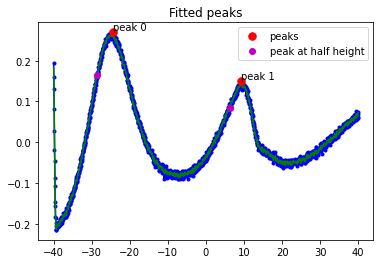

In [5]:
results = analyse_coulomb(quantum_dataset.load_dataset("coulomb", 0), fig=1)

## Generate an overview page

In [6]:
%matplotlib qt

htmldir = tempfile.mkdtemp(prefix="quantum-dataset-results-")
quantum_dataset.generate_overview_page(htmldir, plot_functions=analysis_functions)

webbrowser.open(os.path.join(htmldir, "index.html"), new=1)

generate_results_page: tag allxy
generate_results_page allxy: 0/3: dataset_name 2020-09-03_08-59-32_qtt_allxy_002.json
generate_results_page allxy: 1/3: dataset_name allxy_05-27-11_qtt_user_experiment.json
generate_results_page allxy: 2/3: dataset_name allxy_05-29-07_qtt_user_experiment_x.json
generate_results_page: tag rts
generate_results_page rts: 0/5: dataset_name 19-05-18_qtt_save_segments.json
generate_results_page rts: 1/5: dataset_name 2019-04-12_16-05-53_qtt_scan1D.json
generate_results_page rts: 2/5: dataset_name 2019-04-13_00-15-06_qtt_generic.json
generate_results_page rts: 3/5: dataset_name 2019-09-16_00-05-10_qtt_acquire_segment_m4i.json
generate_results_page rts: 4/5: dataset_name 2019-09-16_00-09-06_qtt_acquire_segment_m4i.json


True

Generate a single results page

In [7]:
htmldir = qtt.utilities.tools.mkdirc(tempfile.mkdtemp(prefix="quantumdataset-polarization-fitting"))

filename = os.path.join(htmldir, "testpage.html")
page = quantum_dataset.generate_results_page("pol_fitting", htmldir, filename, plot_function=analyse_polarization_line)
webbrowser.open(filename, new=1)

generate_results_page: tag pol_fitting
generate_results_page pol_fitting: 0/6: dataset_name 10-08-2018_19-16-35_qtt_scan1Dfastvec_P2(1)_P3(-1).json
generate_results_page pol_fitting: 1/6: dataset_name 10-08-2018_19-17-00_qtt_scan1Dfastvec_P2(1)_P3(-1).json
generate_results_page pol_fitting: 2/6: dataset_name 10-08-2018_19-22-09_qtt_scan1Dfastvec_P2(1)_P3(-1).json
generate_results_page pol_fitting: 3/6: dataset_name 10-08-2018_19-24-07_qtt_scan1Dfastvec_P2(1)_P3(-1).json
generate_results_page pol_fitting: 4/6: dataset_name 10-08-2018_19-30-22_qtt_scan1Dfastvec_P2(1)_P3(-1).json
generate_results_page pol_fitting: 5/6: dataset_name 2019-09-16_00-09-03_qtt_scan1Dfast.json


True

To save additional data, one can create methods using `generate_save_function`.

In [8]:
for tag in ["anticrossing", "coulomb", "pinchoff"]:
    quantum_dataset.generate_save_function(tag)

save_coulomb = quantum_dataset.save_coulomb
save_anticrossing = quantum_dataset.save_anticrossing
save_pinchoff = quantum_dataset.save_pinchoff

In [9]:
plt.close("all")